<a href="https://colab.research.google.com/github/Conrado8a/grupo13_clusterai/blob/master/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime


In [ ]:
pwd

'C:\\Users\\John\\Desktop'

In [ ]:
#Importamos el dataset
intervenciones = pd.read_csv(r'intervenciones-de-seguridad-vial.csv')

In [ ]:
intervenciones.head(3)

,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
0,201401,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
1,201401,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2,201401,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0


In [ ]:
#Nos aseguramos que la columna fehca este en formato fecha (datetime)
intervenciones.fecha=pd.to_datetime(intervenciones.fecha)


In [ ]:
#Agregamos columnas, una con el año y otra con el mes
intervenciones['dia'] = intervenciones.fecha.dt.day
intervenciones['mes'] = intervenciones.fecha.dt.month
intervenciones['año'] = intervenciones.fecha.dt.year
intervenciones.tail()


,periodo,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,dia,mes,año
6658,202008,2020-08-25,19,AU 25 DE MAYO,DESCENDENTE,6000,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,3,0,0,25,8,2020
6659,202008,2020-08-26,21,AU ILLIA,ASCENDENTE,800,BUENO,MOJADA/HUMEDA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0,26,8,2020
6660,202008,2020-08-29,8,AU 25 DE MAYO,ASCENDENTE,3100,LLUVIOSO,MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,29,8,2020
6661,202008,2020-08-29,15,AV. CANTILO,ASCENDENTE,10300,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0,29,8,2020
6662,202008,2020-08-31,2,AU 25 DE MAYO,ASCENDENTE,1500,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,1,0,0,0,31,8,2020


# Gráficos comparativo Lesionados vs Fallecidos

In [ ]:
#Agrupamos por año la cantidad de lesionados y fallecidos
intervenciones_x_año = intervenciones.groupby(["año"])["lesionados", "fallecidos"].sum()
intervenciones_x_año

,lesionados,fallecidos
año,,
2014,684,6
2015,716,12
2016,683,9
2017,743,14
2018,579,5
2019,477,6
2020,123,4


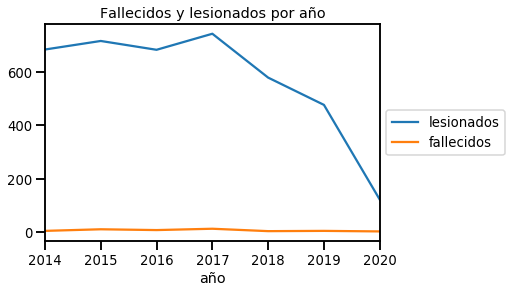

In [ ]:
#Gráfico comparativo de lesionados y fallecidos por año
sns.set_context("talk", font_scale=0.8)
intervenciones_x_año.plot(title = "Fallecidos y lesionados por año" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Los ultimos 3 años hay una tendencia a la baja de los lesionados

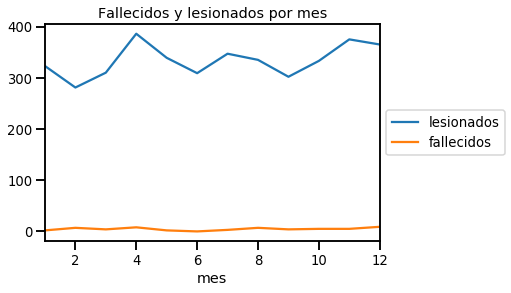

In [ ]:
#Agrupamos por meses la cantidad de lesionados y fallecidos
intervenciones_x_mes = intervenciones.groupby(["mes"])["lesionados", "fallecidos"].sum()

sns.set_context("talk", font_scale=0.8)
intervenciones_x_mes.plot(title = "Fallecidos y lesionados por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

En Abril está el pico, posible relación con Semana Santa 

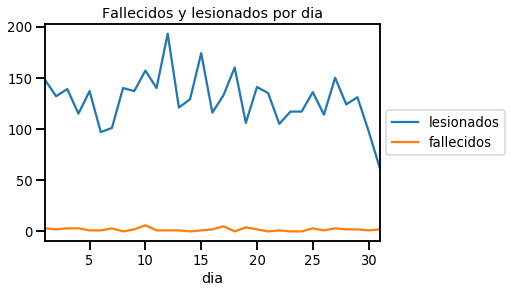

In [ ]:
#Agrupamos por día la cantidad de lesionados y fallecidos
intervenciones_x_dia = intervenciones.groupby(["dia"])["lesionados", "fallecidos"].sum()

sns.set_context("talk", font_scale=0.8)
intervenciones_x_dia.plot(title = "Fallecidos y lesionados por dia" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# BoxPlots 

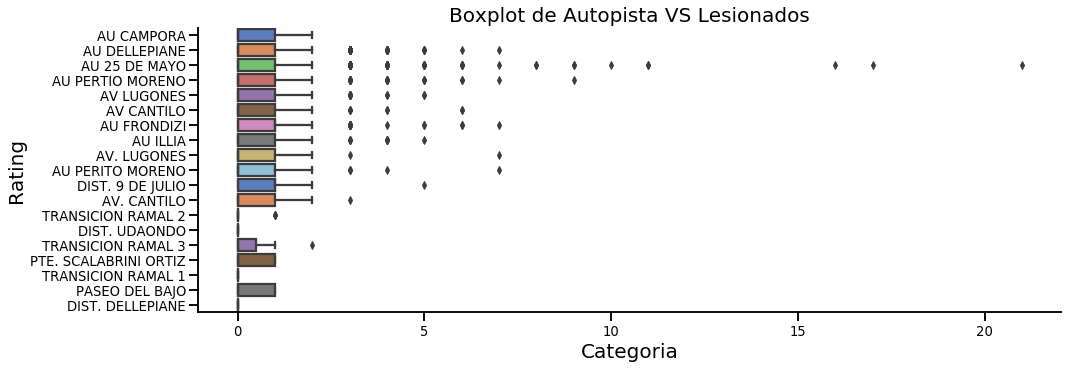

In [ ]:
box_autopsita = sns.catplot(y="autopista",x="lesionados",
                data=intervenciones, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

#g.despine(left=True) 
#g.set_xticklabels(labels,rotation=90)
plt.xlabel("Categoria",size = 20)
plt.ylabel("Rating",size = 20)
plt.title('Boxplot de Autopista VS Lesionados',size = 20)
plt.show()

In [ ]:
prueba5['accidentes'] = prueba5['lesionados'] + prueba5['fallecidos']
prueba5.head()

,periodo,autopista,lesionados,fallecidos,accidentes
0,201401,AU 25 DE MAYO,20,1,21
1,201401,AU CAMPORA,1,0,1
2,201401,AU DELLEPIANE,5,0,5
3,201401,AU FRONDIZI,1,0,1
4,201401,AU ILLIA,2,0,2


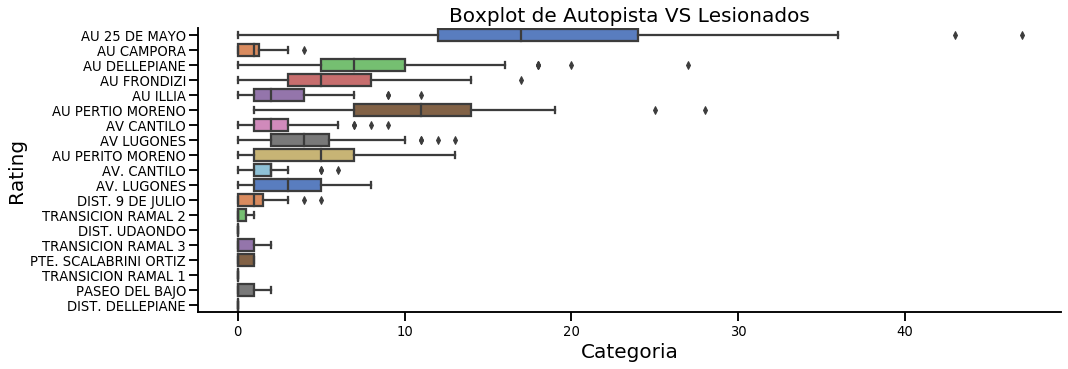

In [ ]:
#dataset_agrupado_periodo_autopista = intervenciones.groupby(["periodo","autopista"],as_index=False)["lesionados", "fallecidos"].sum()


#ay2 = sns.boxplot(x = prueba5.autopista, y = prueba5.accidentes, data = prueba5)
#ay2.set_xticklabels(ay2.get_xticklabels(), rotation=40, ha="right")
#plt.title("Boxplot")
#plt.show()


box_autopsita = sns.catplot(y="autopista",x="accidentes",
                data=prueba5, 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

#g.despine(left=True) 
#g.set_xticklabels(labels,rotation=90)
plt.xlabel("Categoria",size = 20)
plt.ylabel("Rating",size = 20)
plt.title('Boxplot de Autopista VS Lesionados',size = 20)
plt.show()

In [ ]:
prueba2 = intervenciones.groupby(["periodo","autopista"])["lesionados", "fallecidos"].sum()
prueba2.shape

(671, 2)

In [ ]:
a = pd.DataFrame(intervenciones.fecha, 
                                    columns = ['fecha'])
a.shape

(6663, 1)

In [ ]:
b = pd.DataFrame(intervenciones.autopista, 
                                    columns = ['autopista'])
b.shape

(6663, 1)

In [ ]:
clients = pd.DataFrame(clients, columns = ['first_name', 'last_name', 'age'])

In [ ]:
prueba = {'fecha' : [intervenciones.fecha],'last_name' : [intervenciones.autopista]}

In [ ]:
prueba

{'fecha': [0      2014-01-01
  1      2014-01-01
  2      2014-01-01
  3      2014-03-01
  4      2014-03-01
  5      2014-04-01
  6      2014-04-01
  7      2014-05-01
  8      2014-06-01
  9      2014-06-01
  10     2014-06-01
  11     2014-08-01
  12     2014-08-01
  13     2014-09-01
  14     2014-09-01
  15     2014-09-01
  16     2014-09-01
  17     2014-10-01
  18     2014-10-01
  19     2014-11-01
  20     2014-12-01
  21     2014-01-14
  22     2014-01-14
  23     2014-01-14
  24     2014-01-14
  25     2014-01-15
  26     2014-01-15
  27     2014-01-15
  28     2014-01-15
  29     2014-01-15
            ...    
  6633   2020-07-22
  6634   2020-07-25
  6635   2020-07-31
  6636   2020-07-31
  6637   2020-07-31
  6638   2020-07-31
  6639   2020-08-01
  6640   2020-08-02
  6641   2020-08-03
  6642   2020-08-04
  6643   2020-08-06
  6644   2020-08-07
  6645   2020-08-07
  6646   2020-08-12
  6647   2020-08-12
  6648   2020-08-14
  6649   2020-08-15
  6650   2020-08-16
  6651   20

In [ ]:
prueba = pd.DataFrame(prueba, columns = ['fecha', 'autopista'])

In [ ]:
prueba

,fecha,autopista
0,0 2014-01-01 1 2014-01-01 2 201...,NaN


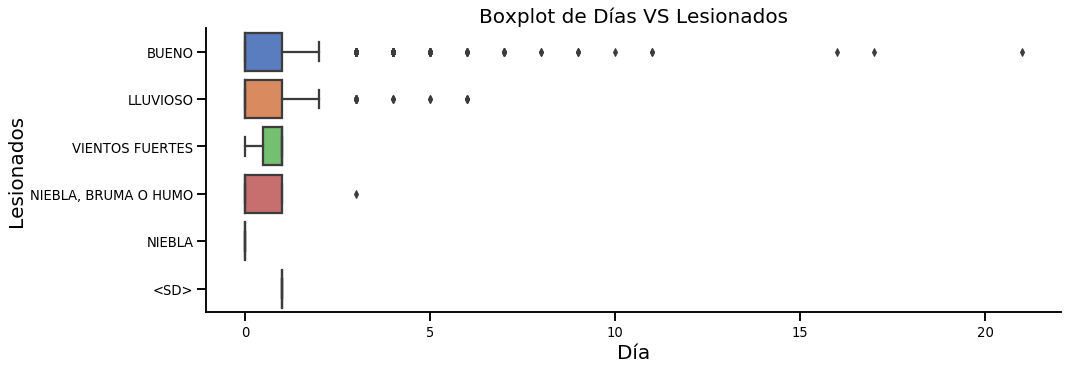

In [ ]:
box_dia = sns.catplot(y="condiciones_meteorologicas",x
                      ="lesionados",
                data=intervenciones, 
                kind="box",
                palette = "muted",
                height =5 ,aspect=3)

#g.despine(left=True) 
#g.set_xticklabels(rotation=85)
plt.xlabel("Día",size = 20)
plt.ylabel("Lesionados",size = 20)
plt.title('Boxplot de Días VS Lesionados',size = 20)
plt.show()

In [ ]:


condiciones_meteorologicas

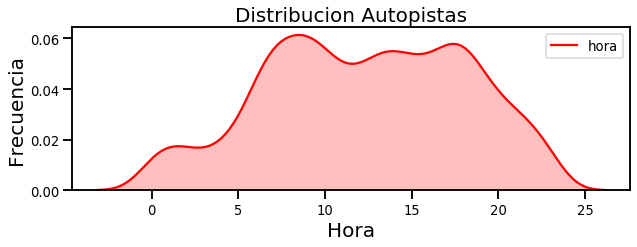

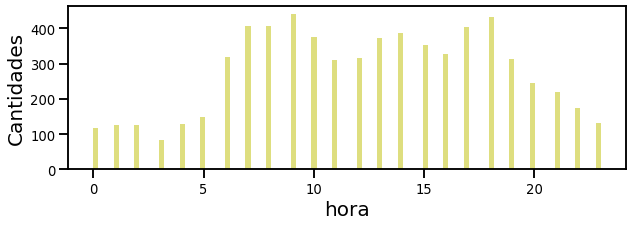

In [ ]:
# Distribucion de accidentes por hora
plt.figure(figsize=(10,3))
g = sns.kdeplot(intervenciones.hora, color="red", shade = True)
plt.xlabel("Hora",size = 20)
plt.ylabel("Frecuencia",size = 20)
plt.title('Distribucion Autopistas',size = 20)
plt.show()

# En este segundo plot vamos a ver el histograma de la cantidad de accidentes enfuncion de la hora.
# El parametro bins define la cantidad de sub-intervalos en los que vamos a dividir el eje-x, es decir las barritas.
plt.figure(figsize=(10,3))
plt.hist(intervenciones['hora'], bins=100,color='y' ,alpha=0.5)
plt.xlabel("hora",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

Horas pico mayor cantidad de accidentes

# Heatmap

In [ ]:
pivot0 = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'autopista', index = 'fecha',fill_value=0, aggfunc = np.sum)
pivot0

autopista,AU 25 DE MAYO,AU CAMPORA,AU DELLEPIANE,AU FRONDIZI,AU ILLIA,AU PERITO MORENO,AU PERTIO MORENO,AV CANTILO,AV LUGONES,AV. CANTILO,AV. LUGONES,DIST. 9 DE JULIO,DIST. DELLEPIANE,DIST. UDAONDO,PASEO DEL BAJO,PTE. SCALABRINI ORTIZ,TRANSICION RAMAL 1,TRANSICION RAMAL 2,TRANSICION RAMAL 3
fecha,,,,,,,,,,,,,,,,,,,
2014-01-01,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-02,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-04,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-06,1,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0
2014-01-07,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-08,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-09,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
correlacion = pivot0.corr()

In [ ]:
correlacion.head(5)

autopista,AU 25 DE MAYO,AU CAMPORA,AU DELLEPIANE,AU FRONDIZI,AU ILLIA,AU PERITO MORENO,AU PERTIO MORENO,AV CANTILO,AV LUGONES,AV. CANTILO,AV. LUGONES,DIST. 9 DE JULIO,DIST. DELLEPIANE,DIST. UDAONDO,PASEO DEL BAJO,PTE. SCALABRINI ORTIZ,TRANSICION RAMAL 1,TRANSICION RAMAL 2,TRANSICION RAMAL 3
autopista,,,,,,,,,,,,,,,,,,,
AU 25 DE MAYO,1.000000,-0.005325,-0.008202,-0.021084,-0.000276,-0.037638,0.031350,-0.007752,0.041605,-0.022774,0.026619,-0.027425,NaN,NaN,-0.006435,-0.003712,NaN,-0.018187,-0.019015
AU CAMPORA,-0.005325,1.000000,0.011250,0.007088,-0.007647,0.015915,-0.018072,-0.012944,0.008540,0.064101,0.019849,-0.007247,NaN,NaN,0.045600,-0.003613,NaN,-0.004427,0.031374
AU DELLEPIANE,-0.008202,0.011250,1.000000,0.008518,0.011100,-0.020604,0.040786,-0.019534,-0.001238,-0.023262,-0.034353,0.013901,NaN,NaN,-0.020422,-0.011780,NaN,0.001699,-0.022632
AU FRONDIZI,-0.021084,0.007088,0.008518,1.000000,0.071546,0.009055,0.000508,-0.006152,0.028750,-0.034920,-0.021412,0.176646,NaN,NaN,-0.018741,-0.010810,NaN,-0.013242,-0.010214
AU ILLIA,-0.000276,-0.007647,0.011100,0.071546,1.000000,-0.009453,0.036169,-0.018538,-0.008591,-0.015879,-0.011473,-0.006533,NaN,NaN,-0.012431,-0.007171,NaN,-0.008784,-0.013776


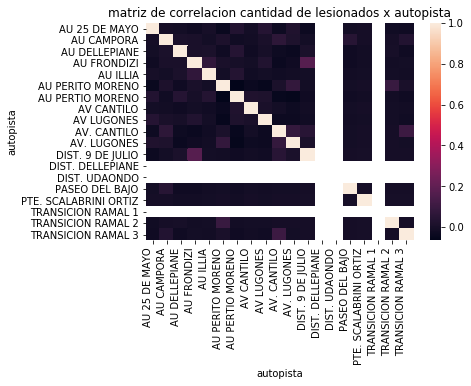

In [ ]:
corr = sns.heatmap(correlacion, xticklabels=1, yticklabels=1)
corr.set_xticklabels(corr.get_xticklabels(), rotation=90, ha="right")
plt.title("matriz de correlacion cantidad de lesionados x autopista")
plt.show()

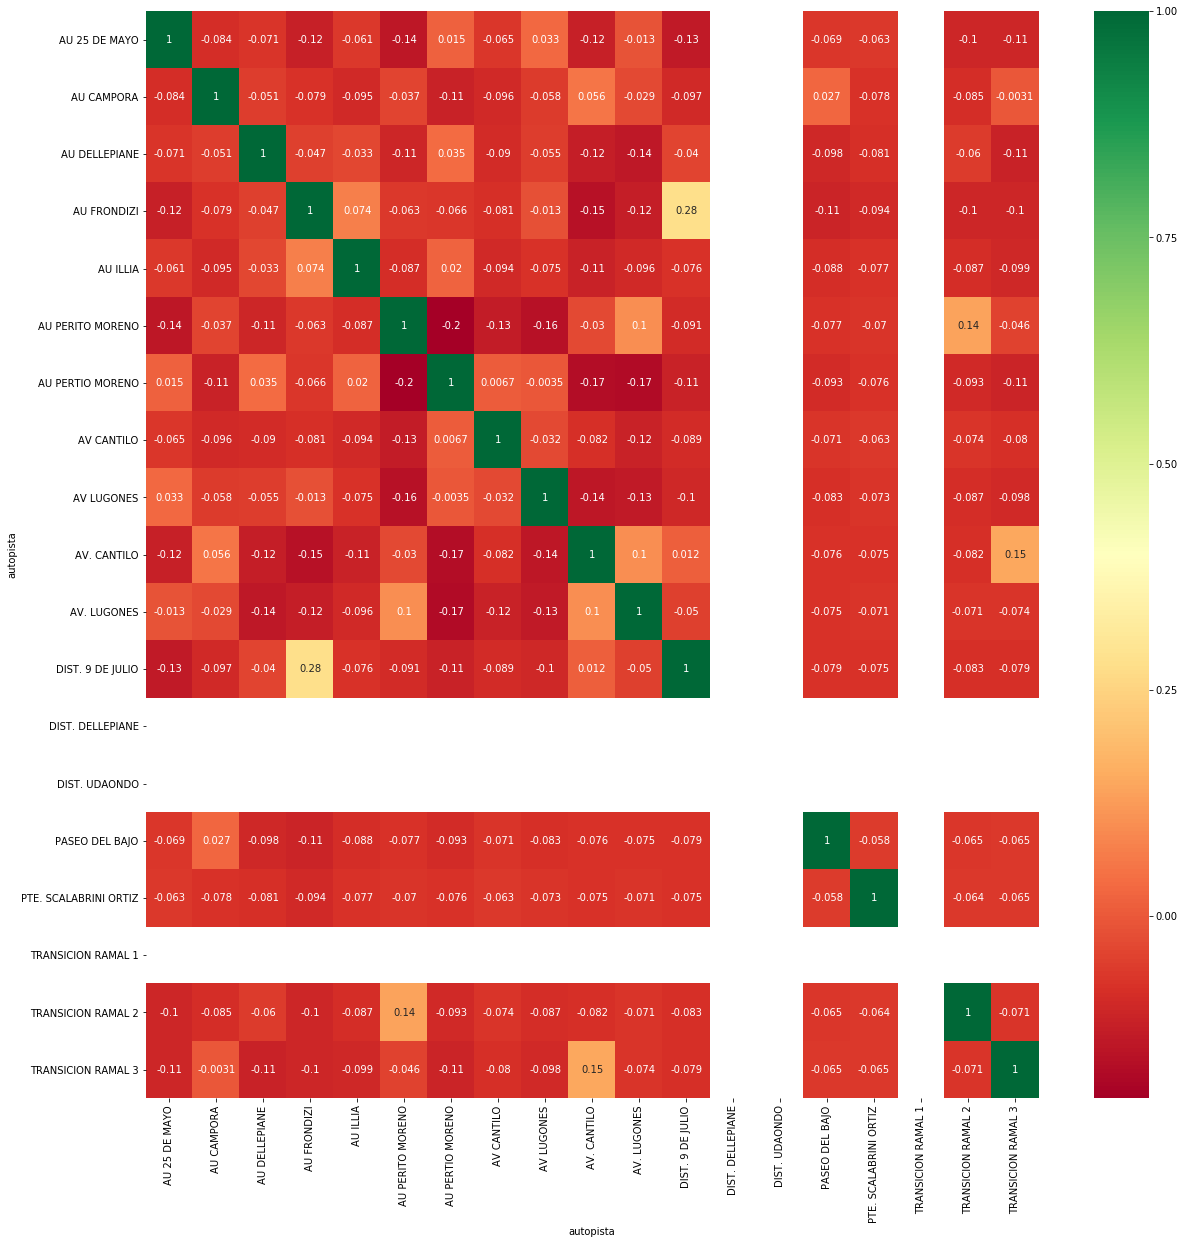

In [ ]:
plt.figure(figsize=(20,20))
heatmap2 = sns.heatmap(correlacion.corr(),annot=True,cmap="RdYlGn")

Conclusiones:

# Countplots

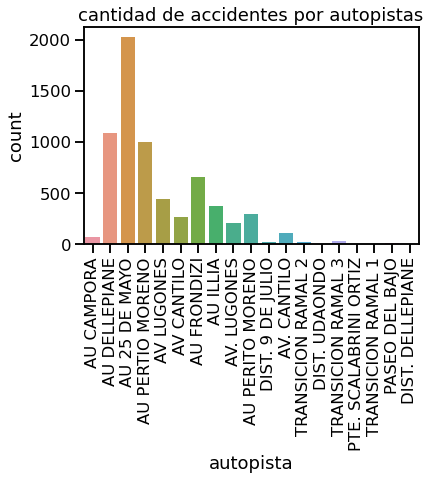

In [ ]:
#Cantidad de accidentes por autopista
sns.set_context("talk")
az = sns.countplot(x="autopista", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de accidentes por autopistas")
plt.show()

### Vemos la incidencia del estado de la autopista 

In [ ]:
pivot01 = pd.pivot_table(intervenciones, values = 'lesionados', columns = 'superficie_de_la_via', index = 'mes',fill_value=0, aggfunc = np.sum)
pivot01

superficie_de_la_via,<SD>,INUNDADA,MOJADA/HUMEDA,OTRO,SECA
mes,,,,,
1,0,0,27,3,293
2,0,0,33,2,246
3,0,0,32,2,276
4,0,0,51,0,335
5,0,0,61,0,278
6,0,0,37,1,271
7,0,0,43,0,304
8,0,0,26,0,302
9,0,0,40,0,262


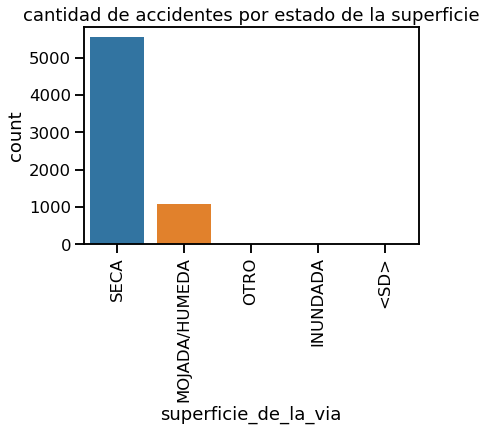

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="superficie_de_la_via", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de accidentes por estado de la superficie")
plt.show()

La condición de la autopista no parece tener una realación proporcional a la cantidad de accidentes. Por lo menos, este gráfico no lo demuestra.

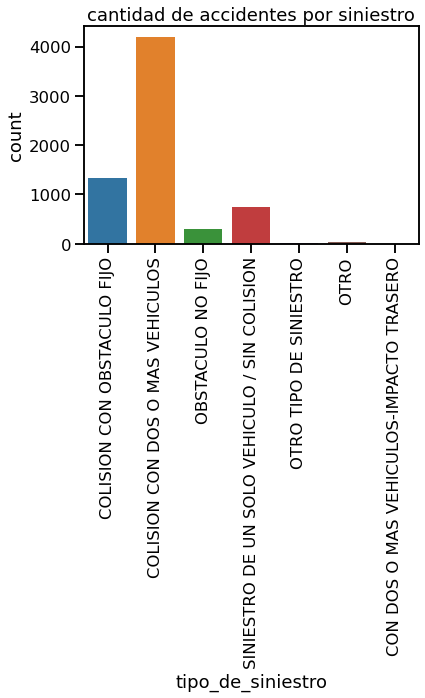

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="tipo_de_siniestro", data=intervenciones)
plt.xticks(rotation=90)
plt.title("cantidad de accidentes por siniestro")
plt.show()

In [ ]:
#Vemos los valores que hay en la columna pk
print("\n", intervenciones['pk'].unique())


 ['600' '5900' '5400' '4700' '3800' '4000' '7000' 'RAMAL ENLACE' '5600'
 '3200' '1000' '10300' 'RAMPA ACCESO' '9050' 'RAMPA EGRESO' '2000' '10200'
 '200' '4500' '8600' '1700' '1600' '5800' '4300' '7500' '8800' 'RAMAL 5'
 '5000' '300' '0' '5300' '2500' '5500' '7400' '2800' '9200' '2100'
 'RAMAL 2BIS' '700' '2700' '1800' '5100' '1300' '500' '7700' '3300' '3700'
 '8200' '6000' '8500' '3600' '2400' '9000' '3500' '6600' '9100' '6900'
 '800' '1100' '9600' '7200' '10100' '1200' '6500' '100' '3000' '5200'
 '2300' '1500' '4600' '7800' 'PUENTE S. ORTIZ' '1400' '2600' '3400' '7100'
 '400' '4200' '900' '401' '9300' '4900' '8400' '5700' '9800' '8700' '8000'
 '6100' '4800' '7600' '8300' '9400' '3100' '2900' '2200' '8100' '1900'
 '8900' 'RAMAL 3' '6200' '6300' '4400' '10400' '3900' '2599' '7300'
 'RAMAL 2' '9700' '6800' 'RAMAL 4' '6400' '9900' '9500' 'RAMAL 8' '4100'
 '550' '3150' '10500' 'RAMAL 1BIS' '1350' '6700' '5550' '8550' '10000'
 'RAMAL 2/1' '7900' 'RAMAL 2/2BIS' '450' 'RAMAL 1' '350' '860' 

In [ ]:
print("\n", intervenciones['banda_y_o_ramal'].unique())


 ['ASCENDENTE' 'DESCENDENTE' 'TRANSICION RAMAL 2' 'TRANSICION RAMAL 4'
 'TRANSICION RAMAL 3' 'DISTRIBUIDOR 9 DE JULIO' 'PUENTE SCALABRINI ORTIZ'
 'DISTRIBUIDOR UDAONDO' 'TRANSICION RAMAL 1' 'DISTRIBUIDOR DELLEPIANE'
 'CARRIL METROBUS' 'PUENTE ANGEL LABRUNA' 'RAMAL 1 BIS' 'RAMAL 2 BIS'
 'RAMAL 6' 'RAMAL DE ENLACE' ' ' 'RAMAL 4' 'RAMAL DE ENLACE (AU1/AU6)'
 'RAMAL 3/4' 'RAMAL 8' 'RAMAL DE EGRESO' 'RAMAL 1' 'RAMAL 3'
 'PTE. LABRUBNA' '-' 'DIST. NORTE - RAMAL 4' 'DIST. SUR - RAMAL 1'
 'RAMAL 12' 'DIST. SUR - RAMAL 2' 'RAMAL 11']


En un principio no vemos útil la información de estas columnas, por lo tanto tampoco creemos que valga la pena destinar tiempo a normalizarla/limpiarla.